### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using the the following dataset, follow the instructions as provided - https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy

•	Showcase sustainable energy indicators and other useful factors. 

•	Dive into vital aspects such as electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth

•	 compare nations, track progress towards Sustainable Development Goal 7, and gain profound insights into global energy consumption patterns over time.

### Step 1: Load and Explore the Dataset

In [417]:
#First, let's load the dataset and examine its structure.

# Load the dataset
df = pd.read_csv('data/global-data-on-sustainable-energy.csv')

In [418]:
# Display the first few rows of the dataset
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [419]:
# Describe the columns
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


### Key Features:

Entity: The name of the country or region for which the data is reported.

Year: The year for which the data is reported, ranging from 2000 to 2020.

Access to electricity (% of population): The percentage of population with access to electricity.

Access to clean fuels for cooking (% of population): The percentage of the population with primary reliance on clean fuels.

Renewable-electricity-generating-capacity-per-capita: Installed Renewable energy capacity per person

Financial flows to developing countries (US $): Aid and assistance from developed countries for clean energy projects.

Renewable energy share in total final energy consumption (%): Percentage of renewable energy in final energy consumption.

Electricity from fossil fuels (TWh): Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.

Electricity from nuclear (TWh): Electricity generated from nuclear power in terawatt-hours.

Electricity from renewables (TWh): Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.

Low-carbon electricity (% electricity): Percentage of electricity from low-carbon sources (nuclear and renewables).

Primary energy consumption per capita (kWh/person): Energy consumption per person in kilowatt-hours.

Energy intensity level of primary energy (MJ/$2011 PPP GDP): Energy use per unit of GDP at purchasing power parity.

Value_co2_emissions (metric tons per capita): Carbon dioxide emissions per person in metric tons.

Renewables (% equivalent primary energy): Equivalent primary energy that is derived from renewable sources.

GDP growth (annual %): Annual GDP growth rate based on constant local currency.

GDP per capita: Gross domestic product per person.

Density (P/Km2): Population density in persons per square kilometer.

Land Area (Km2): Total land area in square kilometers.

Latitude: Latitude of the country's centroid in decimal degrees.

Longitude: Longitude of the country's centroid in decimal degrees.

In [420]:
# Rename Columns to have meaningful names

df_working_copy = df.rename(columns={"Entity":"Country",
                                     "Access to electricity (% of population)": "Electricity_Access_Percent",
                                     "Access to clean fuels for cooking": "CleanFuel_Access_Percent", 
                                     "Renewable-electricity-generating-capacity-per-capita": "Renewable_Electricity_PerPerson", 
                                     "Financial flows to developing countries (US $)" : "Financial_Aids_Dollars",
                                     "Renewables (% equivalent primary energy)" :"Renewable_Energy_Consumption_AgainstTotalEnergy_Percent",
                                     "Electricity from fossil fuels (TWh)" : "Electricity_from_Fossil_Fuels_TWH",
                                     "Electricity from nuclear (TWh)" : "Electricity_from_NuclearPower_TWh",
                                     "Electricity from renewables (TWh)" : "Electricity_from_RenewableSource_TWh",
                                     "Low-carbon electricity (% electricity)" : "LowCarbon_Electricity_Percent",
                                     "Primary energy consumption per capita (kWh/person)" : "Primary_Energy_Consumption_PerPerson_kWh", 
                                     "Value_co2_emissions_kt_by_country" : "Co2_Emission_PerPerson_MetricTon",
                                     "gdp_growth":"Annual_GDP_Growth_Percent", 
                                     "gdp_per_capita":"GDP_PerPerson_Dollars"})
df_working_copy.describe()

,Year,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Financial_Aids_Dollars,Renewable energy share in the total final energy consumption (%),Electricity_from_Fossil_Fuels_TWH,Electricity_from_NuclearPower_TWh,Electricity_from_RenewableSource_TWh,LowCarbon_Electricity_Percent,Primary_Energy_Consumption_PerPerson_kWh,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Co2_Emission_PerPerson_MetricTon,Renewable_Energy_Consumption_AgainstTotalEnergy_Percent,Annual_GDP_Growth_Percent,GDP_PerPerson_Dollars,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [421]:
### Key Features to be used for this exercise

df_key_features = df_working_copy.loc[:,['Year','Country', 
                                         'Electricity_Access_Percent', 
                                         'CleanFuel_Access_Percent',
                                         'Renewable_Electricity_PerPerson',
                                         'Financial_Aids_Dollars',
                                         'Renewable_Energy_Consumption_AgainstTotalEnergy_Percent',
                                         'Electricity_from_Fossil_Fuels_TWH',
                                         'Electricity_from_NuclearPower_TWh',
                                         'Electricity_from_RenewableSource_TWh',
                                         'LowCarbon_Electricity_Percent',
                                         'Primary_Energy_Consumption_PerPerson_kWh',
                                         'Co2_Emission_PerPerson_MetricTon',
                                         'Annual_GDP_Growth_Percent',
                                         'GDP_PerPerson_Dollars']]

df_key_features


,Year,Country,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Financial_Aids_Dollars,Renewable_Energy_Consumption_AgainstTotalEnergy_Percent,Electricity_from_Fossil_Fuels_TWH,Electricity_from_NuclearPower_TWh,Electricity_from_RenewableSource_TWh,LowCarbon_Electricity_Percent,Primary_Energy_Consumption_PerPerson_kWh,Co2_Emission_PerPerson_MetricTon,Annual_GDP_Growth_Percent,GDP_PerPerson_Dollars
0,2000,Afghanistan,1.613591,6.2,9.22,20000.0,NaN,0.16,0.0,0.31,65.957440,302.59482,760.000000,NaN,NaN
1,2001,Afghanistan,4.074574,7.2,8.86,130000.0,NaN,0.09,0.0,0.50,84.745766,236.89185,730.000000,NaN,NaN
2,2002,Afghanistan,9.409158,8.2,8.47,3950000.0,NaN,0.13,0.0,0.56,81.159424,210.86215,1029.999971,NaN,179.426579
3,2003,Afghanistan,14.738506,9.5,8.09,25970000.0,NaN,0.31,0.0,0.63,67.021280,229.96822,1220.000029,8.832278,190.683814
4,2004,Afghanistan,20.064968,10.9,7.75,NaN,NaN,0.33,0.0,0.56,62.921350,204.23125,1029.999971,1.414118,211.382074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,2016,Zimbabwe,42.561730,29.8,62.88,30000.0,NaN,3.50,0.0,3.32,48.680350,3227.68020,11020.000460,0.755869,1464.588957
3645,2017,Zimbabwe,44.178635,29.8,62.33,5570000.0,NaN,3.05,0.0,4.30,58.503407,3068.01150,10340.000150,4.709492,1235.189032
3646,2018,Zimbabwe,45.572647,29.9,82.53,10000.0,NaN,3.73,0.0,5.46,59.412407,3441.98580,12380.000110,4.824211,1254.642265
3647,2019,Zimbabwe,46.781475,30.1,81.40,250000.0,NaN,3.66,0.0,4.58,55.582527,3003.65530,11760.000230,-6.144236,1316.740657


In [89]:
## Understand what are the countries we have in the dataset

df_countries = df_key_features['Country'].unique()
print (df_countries.shape)
df_countries

(176,)


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

## Objectives 1 : : Showcase Sustainable Energy Indicators

##### The provision of adequate and reliable energy services at an affordable cost, in a secure and environmentally benign manner and in conformity with social and economic development needs, is an essential element of sustainable development. 

In [428]:
df_features_sustainable_energy_indicator = ''

features_sustainable_energy = ['Year','Country', 
                               'Electricity_Access_Percent', 
                               'CleanFuel_Access_Percent',
                               'Renewable_Electricity_PerPerson',
                               'Co2_Emission_PerPerson_MetricTon'
                              ]

df_features_sustainable_energy = df_key_features.loc[:, features_sustainable_energy]

# Filter data for 10 selected countries to minimize higher computational requirement
selected_countries = ['Japan', 'Spain', 'Zimbabwe', 'United States', 'China', 'India', 'Afghanistan', 'Australia', 'Bangladesh', 'Saudi Arabia']

df_features_sustainable_energy_indicator = df_features_sustainable_energy[df_features_sustainable_energy['Country'].isin(selected_countries)]

#### Step 1: visualize key indicators related to sustainable energy, such as electricity access, renewable energy consumption, carbon emissions, and energy intensity.

***Compare Nations and Track Progress***

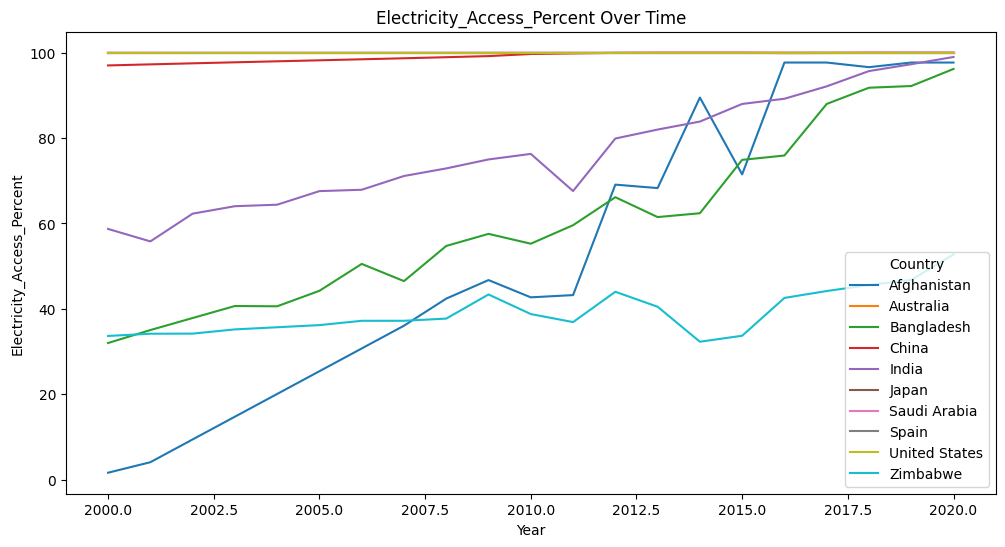

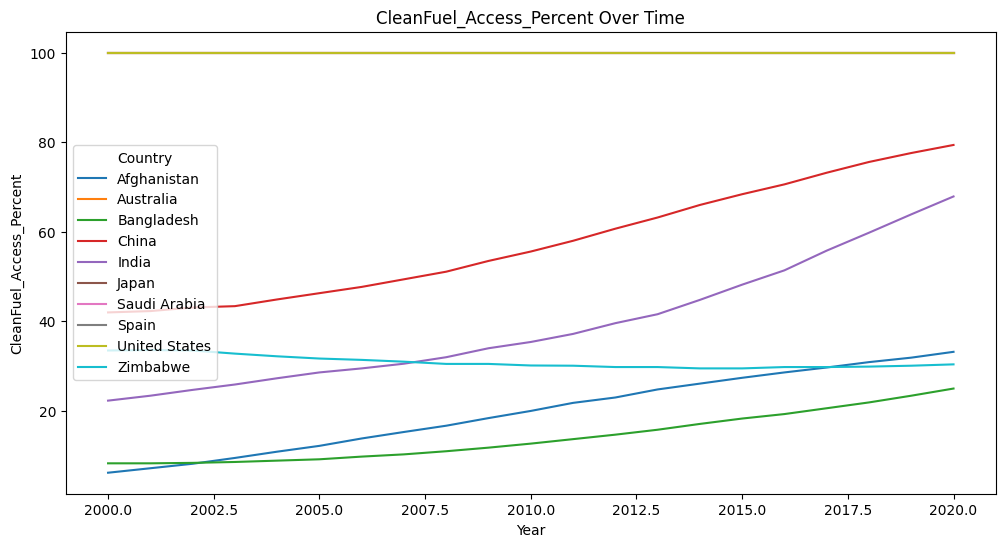

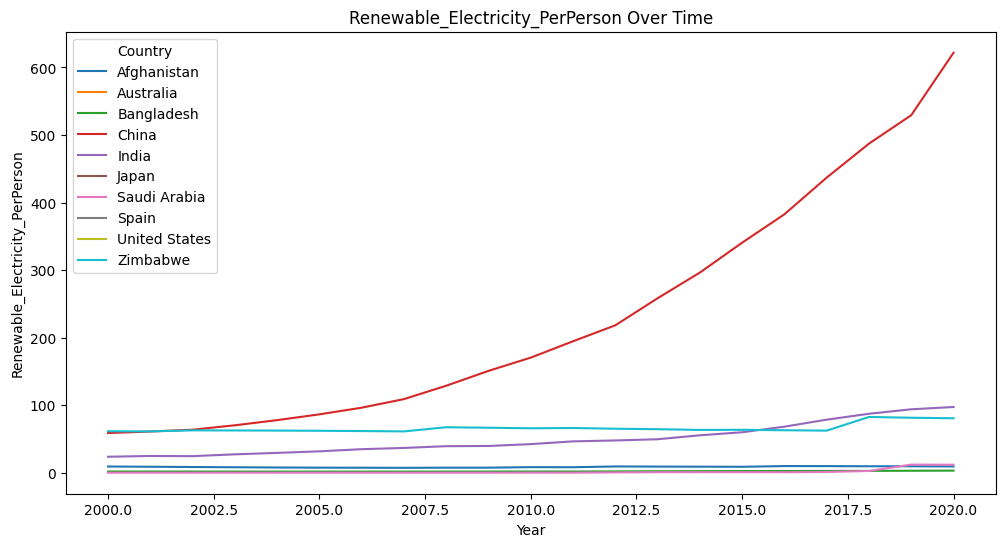

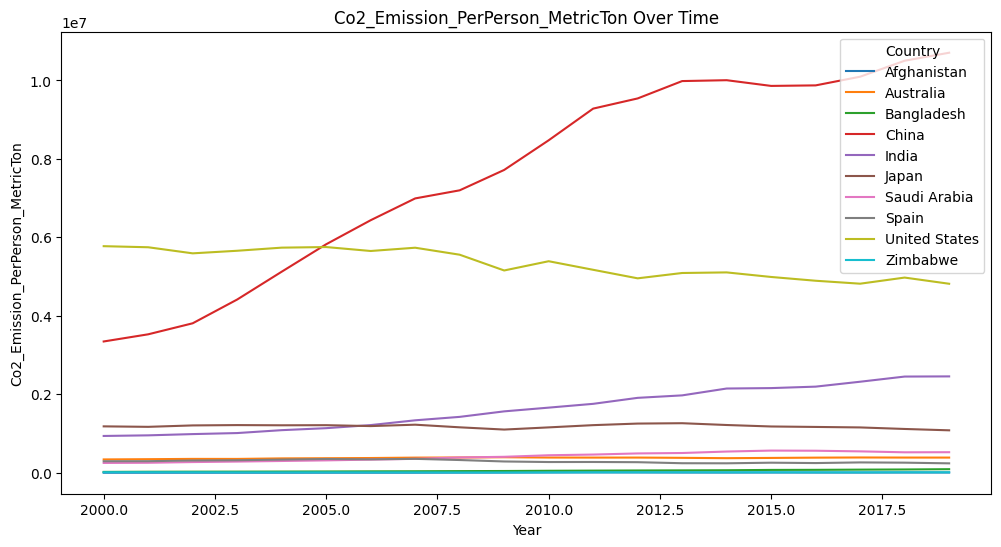

In [429]:
features_indicator = ['Electricity_Access_Percent', 
                               'CleanFuel_Access_Percent',
                               'Renewable_Electricity_PerPerson',
                               'Co2_Emission_PerPerson_MetricTon'
                              ]

for indicator in features_indicator:
    plt.figure(figsize=(12, 6))
    sns.color_palette("Paired")
    sns.lineplot(data=df_features_sustainable_energy_indicator, x='Year', y=indicator, hue='Country')
    plt.title(f'{indicator} Over Time')
    plt.savefig('images/'f'{indicator}_Over_Time.jpg')
    plt.show()

#### Step 2: Analyze Vital Aspects
**We will focus on specific areas such as electricity access, renewable energy, carbon emissions, energy intensity, financial flows, and economic growth.**

In [430]:
# Calculate summary statistics for the vital aspects
summary_stats = df_key_features[['Electricity_Access_Percent', 'Renewable_Electricity_PerPerson', 'Co2_Emission_PerPerson_MetricTon', 'LowCarbon_Electricity_Percent', 'Annual_GDP_Growth_Percent', 'GDP_PerPerson_Dollars']].describe()
summary_stats

,Electricity_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon,LowCarbon_Electricity_Percent,Annual_GDP_Growth_Percent,GDP_PerPerson_Dollars
count,3639.000000,2718.000000,3.221000e+03,3607.000000,3332.000000,3367.000000
mean,78.933702,113.137498,1.598665e+05,36.801182,3.441610,13283.774348
std,30.275541,244.167256,7.736611e+05,34.314884,5.686720,19709.866716
min,1.252269,0.000000,1.000000e+01,0.000000,-62.075920,111.927225
25%,59.800890,3.540000,2.020000e+03,2.877847,1.383302,1337.813437
50%,98.361570,32.910000,1.050000e+04,27.865068,3.559855,4578.633208
75%,100.000000,112.210000,6.058000e+04,64.403792,5.830099,15768.615365
max,100.000000,3060.190000,1.070722e+07,100.000010,123.139555,123514.196700


#### Step 3 : Worldwide progress towards Sustainable Development Goal 7

**We will compare different countries and track their progress towards Sustainable Development Goal 7.**

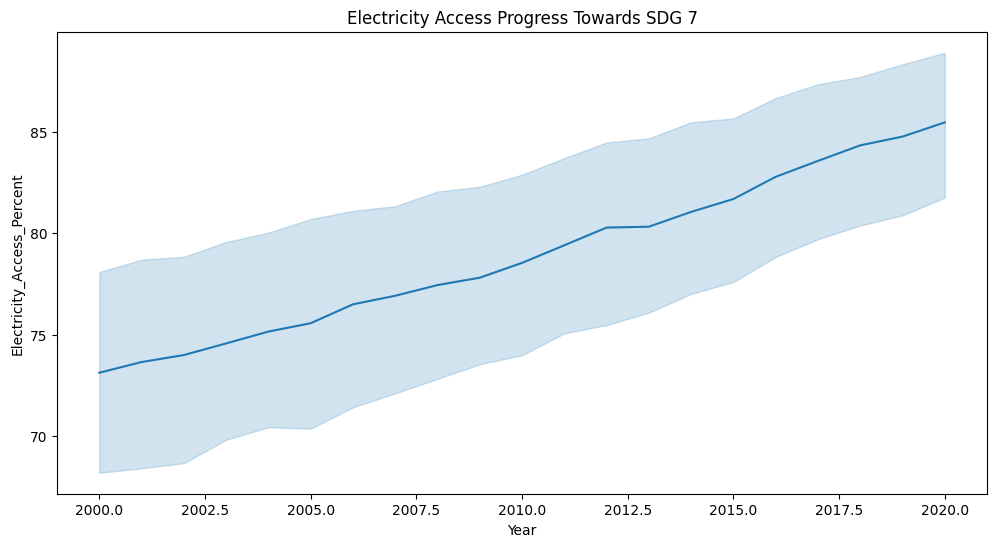

In [431]:
# Plotting the progress towards SDG 7
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_key_features, x='Year', y='Electricity_Access_Percent')
plt.title('Electricity Access Progress Towards SDG 7')
plt.savefig('images/Electricity_Access_Progress_Towards_SDG7.jpg')
plt.show()

#### Step 4: Insights into Global Energy Consumption Patterns

**We will identify trends and patterns in global energy consumption over time.**

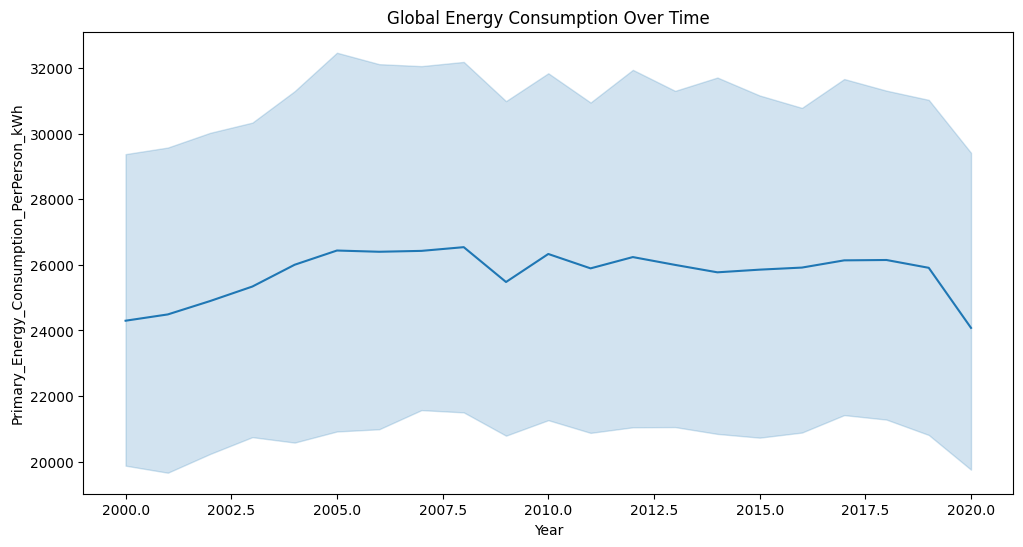

In [432]:
# Plot global energy consumption over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_key_features, x='Year', y='Primary_Energy_Consumption_PerPerson_kWh')
plt.title('Global Energy Consumption Over Time')
plt.savefig('images/Global_Energy_Consumption_Over_Time.jpg')
plt.show()

## Objective 2:: How are the nations going to perform in the future against their SDG7 goals

Build a time series model to track progress in electricity access, clean fuel access, 
renewable electricity per person, and CO2 emissions per person over the next four years



### Step 1: Data Processing 

In [433]:
# Features to be uses to build a Time Series Model
features_time_series = ''
df_features_time_series = ''



features_time_series = ['Year','Country', 
                               'Electricity_Access_Percent', 
                               'CleanFuel_Access_Percent',
                              'Renewable_Electricity_PerPerson',
                               'Co2_Emission_PerPerson_MetricTon'
                             ]


df_features_time_series = df_key_features.loc[:, features_time_series]


In [434]:
#Handle missing values
# Columns to consider for imputation
impute_features = ['Electricity_Access_Percent', 'CleanFuel_Access_Percent', 'Renewable_Electricity_PerPerson', 'Co2_Emission_PerPerson_MetricTon']
#impute_features = ['CleanFuel_Access_Percent']

# Keep only the relevant columns for imputation
impute_df = df_features_time_series[impute_features]

# KNN imputation for missing values
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_data = knn_imputer.fit_transform(impute_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=impute_features)

# Replace the original columns with the imputed values
df_features_time_series[impute_features] = imputed_df

# Check for any remaining missing values

df_features_time_series.dropna(inplace=True)  # This modifies the original DataFrame
print(df_features_time_series.isna().sum())

df_features_time_series



Year                                0
Country                             0
Electricity_Access_Percent          0
CleanFuel_Access_Percent            0
Renewable_Electricity_PerPerson     0
Co2_Emission_PerPerson_MetricTon    0
dtype: int64


,Year,Country,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon
0,2000,Afghanistan,1.613591,6.2,9.22,760.000000
1,2001,Afghanistan,4.074574,7.2,8.86,730.000000
2,2002,Afghanistan,9.409158,8.2,8.47,1029.999971
3,2003,Afghanistan,14.738506,9.5,8.09,1220.000029
4,2004,Afghanistan,20.064968,10.9,7.75,1029.999971
...,...,...,...,...,...,...
3644,2016,Zimbabwe,42.561730,29.8,62.88,11020.000460
3645,2017,Zimbabwe,44.178635,29.8,62.33,10340.000150
3646,2018,Zimbabwe,45.572647,29.9,82.53,12380.000110
3647,2019,Zimbabwe,46.781475,30.1,81.40,11760.000230


## Step 2: Extract Relevant Features

Select the required features and ensure they are in the correct format.

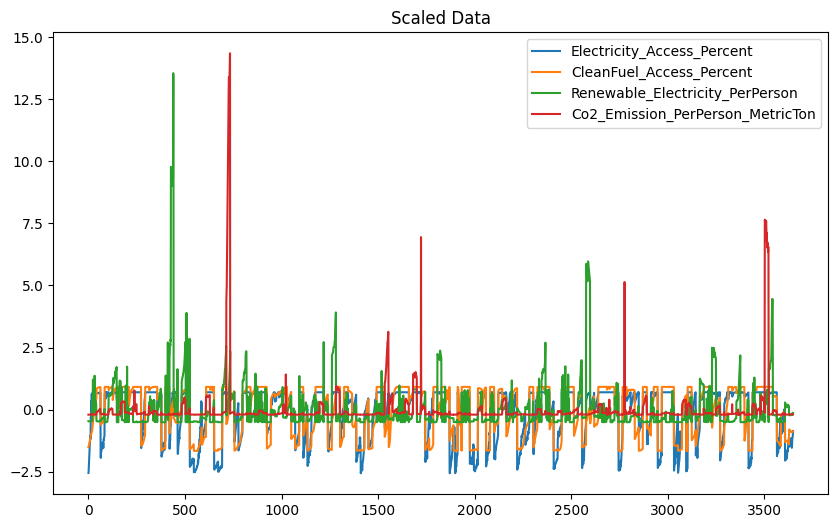

,Year,Country,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon
0,2000,Afghanistan,1.613591,6.2,9.22,760.000000
1,2001,Afghanistan,4.074574,7.2,8.86,730.000000
2,2002,Afghanistan,9.409158,8.2,8.47,1029.999971
3,2003,Afghanistan,14.738506,9.5,8.09,1220.000029
4,2004,Afghanistan,20.064968,10.9,7.75,1029.999971
...,...,...,...,...,...,...
3644,2016,Zimbabwe,42.561730,29.8,62.88,11020.000460
3645,2017,Zimbabwe,44.178635,29.8,62.33,10340.000150
3646,2018,Zimbabwe,45.572647,29.9,82.53,12380.000110
3647,2019,Zimbabwe,46.781475,30.1,81.40,11760.000230


In [435]:
from sklearn.preprocessing import StandardScaler
# Select the required features and ensure they are in the correct format.
features = ['Electricity_Access_Percent', 'CleanFuel_Access_Percent', 'Renewable_Electricity_PerPerson', 'Co2_Emission_PerPerson_MetricTon']
#features = ['CleanFuel_Access_Percent']

# Since the features are in different units, we will use StandardScaler to scale them.
# Scale the features
scaler = StandardScaler()
df_features_time_series_scaled = pd.DataFrame(scaler.fit_transform(df_features_time_series[features]), columns=features)

# Visualize the data to check scaled dimensions
df_features_time_series_scaled.plot(figsize=(10, 6))
plt.title('Scaled Data')
plt.savefig('images/scaled_data.jpg')
plt.show()
df_features_time_series_scaled.reset_index(drop=True)

df_features_time_series.reset_index(drop=True)

In [436]:
# Add the year column back to the scaled data for time series

df_features_time_series_scaled['Year'] = df_features_time_series['Year']

df_features_time_series_scaled


,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon,Year
0,-2.551318,-1.507469,-0.465209,-0.203543,2000
1,-2.470033,-1.481644,-0.466863,-0.203584,2001
2,-2.293836,-1.455818,-0.468654,-0.203176,2002
3,-2.117812,-1.422245,-0.470399,-0.202918,2003
4,-1.941883,-1.386089,-0.471960,-0.203176,2004
...,...,...,...,...,...
3644,-1.198833,-0.897985,-0.218770,-0.189599,2016
3645,-1.145428,-0.897985,-0.221296,-0.190523,2017
3646,-1.099384,-0.895402,-0.128525,-0.187751,2018
3647,-1.059458,-0.890237,-0.133715,-0.188594,2019


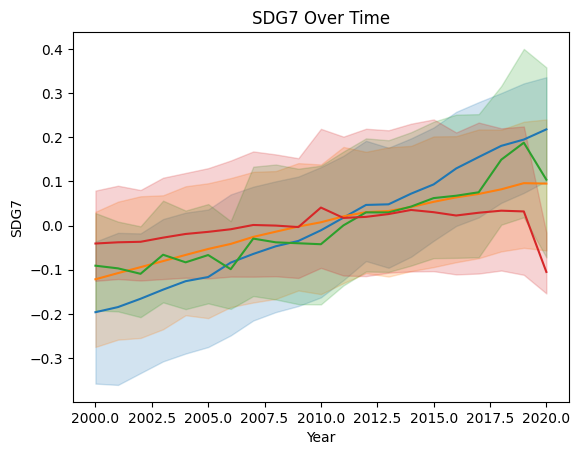

In [441]:
#plt.figure(figsize=(12, 6))
sns.lineplot(data=df_features_time_series_scaled, x='Year', y='Electricity_Access_Percent')
sns.lineplot(data=df_features_time_series_scaled, x='Year', y='CleanFuel_Access_Percent')
sns.lineplot(data=df_features_time_series_scaled, x='Year', y='Renewable_Electricity_PerPerson')
sdg = sns.lineplot(data=df_features_time_series_scaled, x='Year', y='Co2_Emission_PerPerson_MetricTon')

# add label to the axis and label to the plot
sdg.set(xlabel ="Year", ylabel = "SDG7", title ='SDG7 Over Time', label= df_features_time_series[features], mouseover=True)
fig = sdg.get_figure()
fig.savefig("images/sdg7.jpg")


### Step 3: Prepare the data for time series analysis

In [100]:
df_features_time_series_cleaned = ''
# Ensure the 'Year' column is in datetime format
df_features_time_series['Year'] = pd.to_datetime(df_features_time_series['Year'], format='%Y')

# Set 'Year' as the index
df_features_time_series.set_index('Year', inplace=True)

# Select the relevant features
features = ['Electricity_Access_Percent', 'CleanFuel_Access_Percent', 'Renewable_Electricity_PerPerson', 'Co2_Emission_PerPerson_MetricTon']
df_features_time_series_cleaned = df_features_time_series[features]

### Step 4: Resample the Data

Ensure the data is properly resampled if needed.

In [101]:
# Resample the data to annual frequency
df_annual = df_features_time_series_cleaned.resample('Y').mean()
df_annual

,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon
Year,,,,
2000-12-31,72.918277,59.863526,90.739988,120665.917954
2001-12-31,73.269865,60.403953,89.428837,122708.578180
2002-12-31,73.839863,60.925233,86.740023,123549.498840
2003-12-31,74.465838,61.458023,96.143314,130465.871276
2004-12-31,75.045612,61.998488,92.398512,136592.245049
2005-12-31,75.330997,62.522674,95.994419,140130.217875
2006-12-31,76.320363,62.964360,89.024360,144440.425067
2007-12-31,76.913793,63.580000,104.104839,151567.067885
2008-12-31,77.440696,64.037874,102.262943,150559.047230


## Step 5: Train-Test Split

## Split the data into training and testing sets.

In [102]:
# Define the split point (e.g., last 4 years for testing)
split_date = '2016-12-31'
train = df_annual[:split_date]
test = df_annual[split_date:]

# Check the split
print(train.tail())
print(test.head())

            Electricity_Access_Percent  CleanFuel_Access_Percent  \
Year                                                               
2012-12-31                   80.275411                 65.750920   
2013-12-31                   80.318206                 65.850800   
2014-12-31                   81.048829                 66.199314   
2015-12-31                   81.683522                 66.656514   
2016-12-31                   82.777890                 67.048629   

            Renewable_Electricity_PerPerson  Co2_Emission_PerPerson_MetricTon  
Year                                                                           
2012-12-31                       117.048126                     165105.331335  
2013-12-31                       117.020183                     169771.740986  
2014-12-31                       119.904000                     176635.910233  
2015-12-31                       124.086537                     172894.773396  
2016-12-31                       125.259509

# Step 5: Build a Pipeline

Create a pipeline with StandardScaler and ARIMA. Note that ARIMA models work on univariate time series, so we need to build separate models for each feature.

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to create and fit the ARIMA model
def fit_arima_model(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Example function to create a pipeline for a feature
def create_pipeline_for_feature(series):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('arima', fit_arima_model(series, (5,1,0)))
    ])
    return pipeline

# Create pipelines for each feature
pipelines = {feature: create_pipeline_for_feature(train[feature]) for feature in features}

pipelines

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'Electricity_Access_Percent': Pipeline(steps=[('scaler', StandardScaler()),
                 ('arima',
                  <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7efffa39e370>)]),
 'CleanFuel_Access_Percent': Pipeline(steps=[('scaler', StandardScaler()),
                 ('arima',
                  <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7efffb0c37f0>)]),
 'Renewable_Electricity_PerPerson': Pipeline(steps=[('scaler', StandardScaler()),
                 ('arima',
                  <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7efffb1840d0>)]),
 'Co2_Emission_PerPerson_MetricTon': Pipeline(steps=[('scaler', StandardScaler()),
                 ('arima',
                  <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7efffb184f40>)])}

## Step 6: Train the Model

Fit the model on the training data.

In [104]:
# Fit the models for each feature
models = {}
for feature, pipeline in pipelines.items():
    # Standardize the feature
    scaled_feature = pipeline.named_steps['scaler'].fit_transform(train[[feature]].values)
    # Fit the ARIMA model
    models[feature] = fit_arima_model(scaled_feature, (5,1,0))


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


# Step 7: Forecast Future Values

Predict future values for the next four years.

In [121]:
# Number of periods to forecast
n_periods = 4

# Forecast future values for each feature
forecasts = {}
for feature, model in models.items():
    forecast = model.forecast(steps=n_periods)
    forecasts[feature] = forecast


# Step 8: Evaluate the Model

Assess the performance of the model on the historical data .

In [122]:
# Example evaluation of one model
from sklearn.metrics import mean_squared_error

#feature = 'Electricity_Access_Percent'
for feature in features:
    train_size = int(len(df_annual) * 0.8)
    train, test = df_annual[feature][:train_size], df_annual[feature][train_size:]

    model = models[feature]
    predictions = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

    mse = mean_squared_error(test, predictions)
    print(f'Mean Squared Error for {feature}: {mse}')


Mean Squared Error for Electricity_Access_Percent: 6741.524914023628
Mean Squared Error for CleanFuel_Access_Percent: 4351.7954241105135
Mean Squared Error for Renewable_Electricity_PerPerson: 18002.506731978734
Mean Squared Error for Co2_Emission_PerPerson_MetricTon: 24812432016.179806


# Step 9: Visualize the Results

Plot the historical and forecasted values to visualize the progress

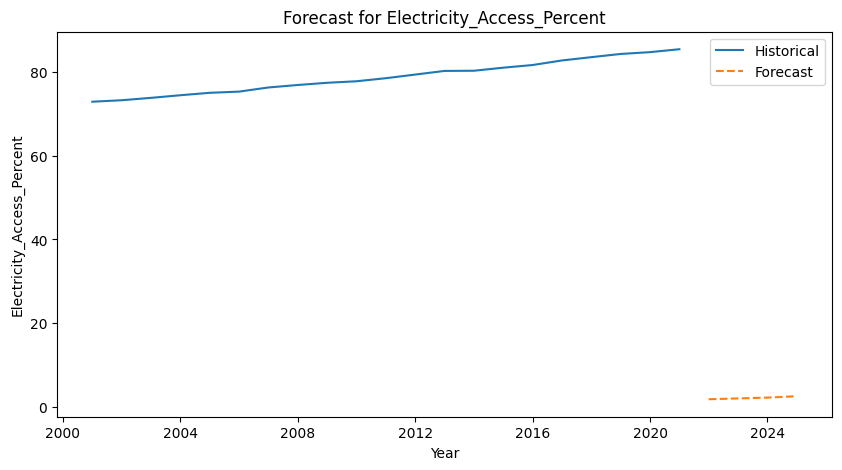

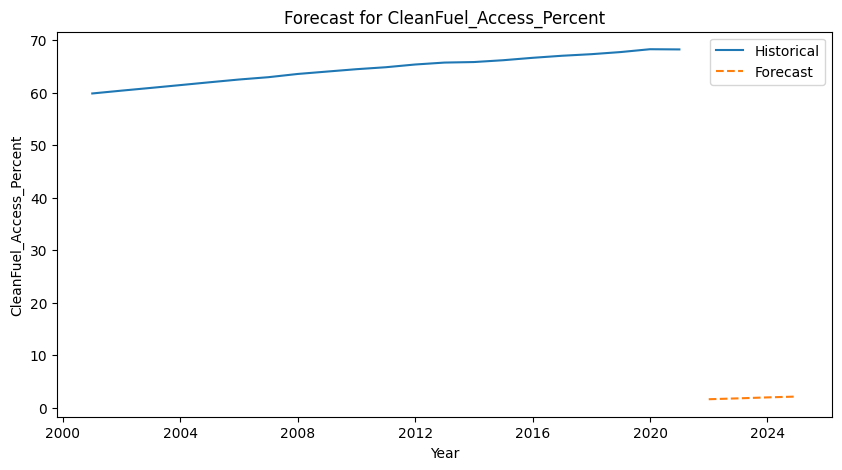

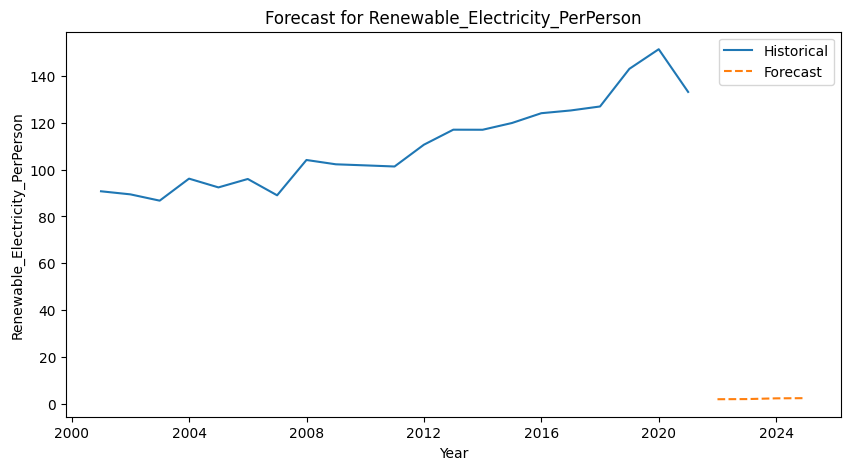

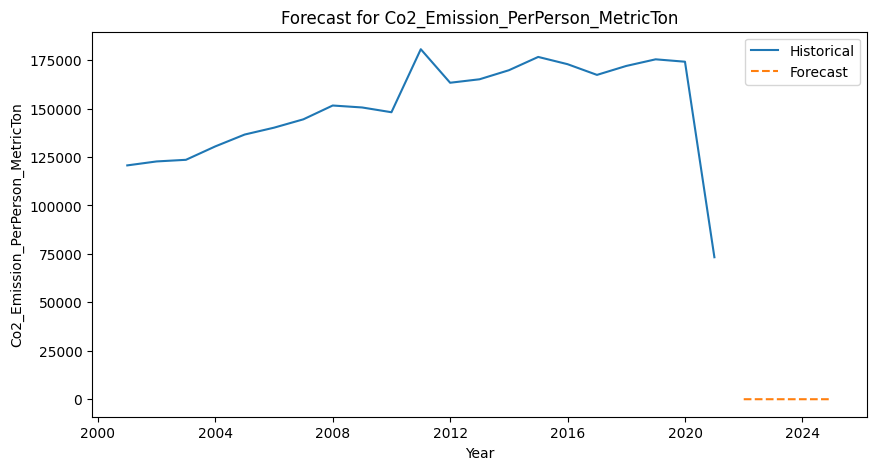

In [124]:
import matplotlib.pyplot as plt

# Plot the historical and forecasted values for each feature
for feature, forecast in forecasts.items():
    plt.figure(figsize=(10, 5))
    plt.plot(df_annual[feature], label='Historical')
    plt.plot(pd.date_range(start=df_annual.index[-1], periods=n_periods+1, freq='Y')[1:], forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for {feature}')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.savefig('images/'f'{feature}_forecast.jpg')
    plt.show()


### Objective 3:: Find whether a country's renewable energy consumption is above or below the median.

### Step 1: Feature Selection

Choose the relevant features for the classification task.

In [177]:
# Select the relevant features
features = [
    'Year', 
    'Country', 
    'Renewable_Electricity_PerPerson'
]

df_features_svc = df_key_features[features].dropna().reset_index()
df_features_svc.isnull().sum()

index                              0
Year                               0
Country                            0
Renewable_Electricity_PerPerson    0
dtype: int64

### Step 2: Label Creation

Create a binary target variable indicating progress towards sustainability goals. For simplicity, let's define a country as making progress if its renewable energy consumption exceeds a certain threshold (e.g., 30%).

In [178]:
# Create a binary target variable
threshold = 30
df_features_svc['Progress'] = (df_features_svc['Renewable_Electricity_PerPerson'] > threshold).astype(int)

# Target variable
target = 'Progress'
df_features_svc

,index,Year,Country,Renewable_Electricity_PerPerson,Progress
0,0,2000,Afghanistan,9.22,0
1,1,2001,Afghanistan,8.86,0
2,2,2002,Afghanistan,8.47,0
3,3,2003,Afghanistan,8.09,0
4,4,2004,Afghanistan,7.75,0
...,...,...,...,...,...
2713,3644,2016,Zimbabwe,62.88,1
2714,3645,2017,Zimbabwe,62.33,1
2715,3646,2018,Zimbabwe,82.53,1
2716,3647,2019,Zimbabwe,81.40,1


### Step 3: Train-Test Split

Split the data into training and testing sets.

In [179]:
from sklearn.model_selection import train_test_split

# Encode 'Country' and 'Year' as categorical variables
df_features_svc['Country'] = df_features_svc['Country'].astype('category').cat.codes
df_features_svc['Year'] = df_features_svc['Year'].astype('category').cat.codes


# Split the data

X = df_features_svc.drop(columns=target)
y = df_features_svc[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Optimize the Classification Model

In [180]:
# Use GridSearchCV to find the best hyperparameters for each model.

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid for each model
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

param_grid_logreg = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

param_grid_svc = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Create pipelines for each model
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Create GridSearchCV objects for each model
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy')

# Fit the models
grid_knn.fit(X_train, y_train)
grid_logreg.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)

print(grid_knn)
print(grid_logreg)
print(grid_svc)


/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='accuracy')
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', '

In [181]:
# Compare the performance of the different models.

# Print the best parameters and scores for each model
print(f"KNN Best Params: {grid_knn.best_params_}, Best Score: {grid_knn.best_score_}")
print(f"Logistic Regression Best Params: {grid_logreg.best_params_}, Best Score: {grid_logreg.best_score_}")
print(f"SVC Best Params: {grid_svc.best_params_}, Best Score: {grid_svc.best_score_}")


KNN Best Params: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}, Best Score: 0.9452587531119232
Logistic Regression Best Params: {'logreg__C': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}, Best Score: 0.9958588908310821
SVC Best Params: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}, Best Score: 0.9963186609460246


In [182]:
# Assess the performance of the models on the test set.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred_knn = grid_knn.predict(X_test)
y_pred_logreg = grid_logreg.predict(X_test)
y_pred_svc = grid_svc.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f'KNN Test Accuracy: {accuracy_knn}')
print(f'Logistic Regression Test Accuracy: {accuracy_logreg}')
print(f'SVC Test Accuracy: {accuracy_svc}')

# Print classification reports
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))


KNN Test Accuracy: 0.9485294117647058
Logistic Regression Test Accuracy: 0.9926470588235294
SVC Test Accuracy: 0.9944852941176471
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       271
           1       0.99      0.90      0.95       273

    accuracy                           0.95       544
   macro avg       0.95      0.95      0.95       544
weighted avg       0.95      0.95      0.95       544

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       271
           1       1.00      0.99      0.99       273

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       271
          

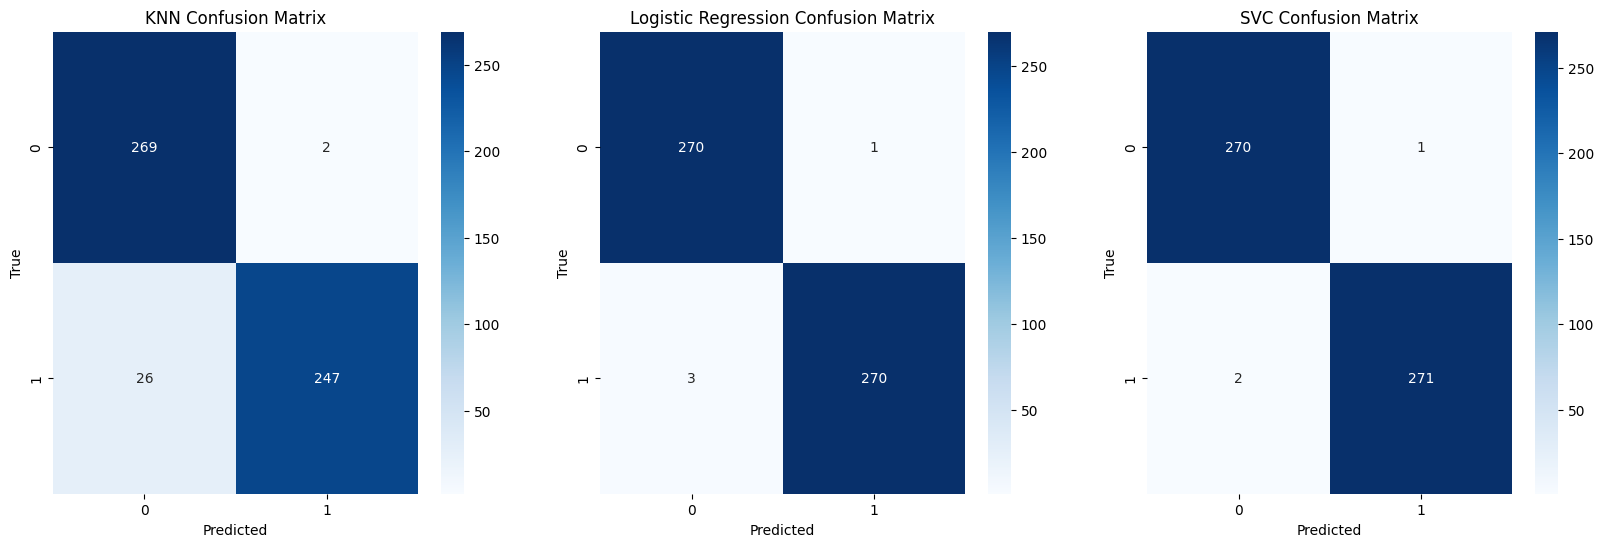

In [183]:
# Plot the confusion matrix and other relevant evaluation metrics to visualize the results.

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for each model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrices
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.savefig('images/confusion_matrix.jpg')
plt.show()

### Conclusion:
The best model from the above analysis is SVM as it has the highest test score and also the lowest fit time, so we will continue to use the SVM model for Classification needs for the Sustainability dataset

### Step 5: Build and Train the SVM Model
Train the SVM model using the training data. Also use the best param based on the GridSearch :
SVC Best Params: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}, Best Score: 0.9975206611570249

In [184]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C=100, gamma='scale'))
])

# Train the model
pipeline.fit(X_train, y_train)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=100, kernel='linear'))])


### Step 6: Evaluate the Model

Assess the performance of the model on the test set.

Accuracy: 0.9944852941176471
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       271
           1       1.00      0.99      0.99       273

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544



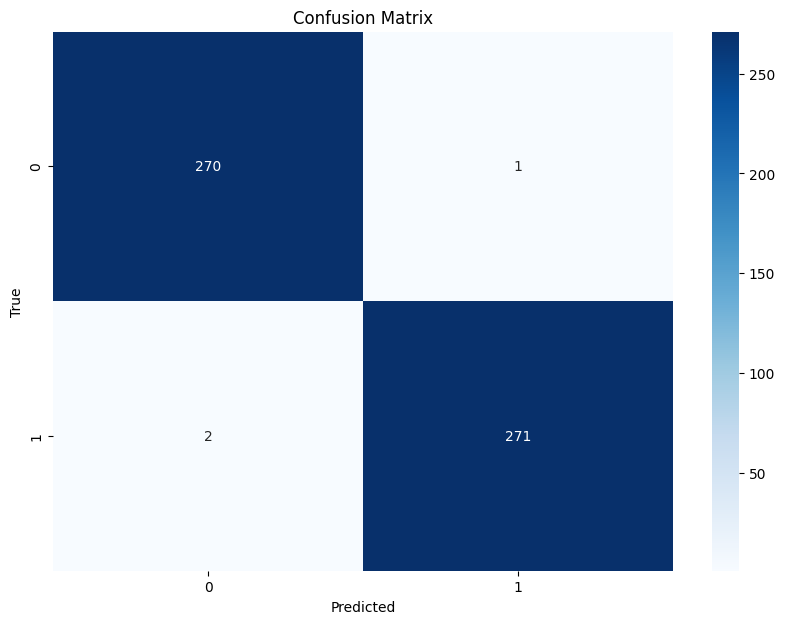

In [185]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('images/confusion_matrix_svc.jpg')
plt.show()

### Step 7: Insights Extraction

Interpret the results to demonstrate the sustainability use case.

In [212]:
# Add the predictions to the test set DataFrame
X_test['Predicted_Progress'] = y_pred

# Re-attach the 'Country' and 'Year' columns from the original DataFrame for easier interpretation
X_test_with_metadata = X_test.copy()
X_test_with_metadata['Country'] = df_key_features.loc[X_test.index, 'Country']
X_test_with_metadata['Year'] = df_key_features.loc[X_test.index, 'Year']

# Display the final comparison with country, year, and prediction
final_results = X_test_with_metadata[['Country', 'Year', 'Predicted_Progress']]

# Aggregate results by country
final_results = final_results.groupby('Country')['Predicted_Progress'].mean().reset_index()

# Sort countries by predicted progress
final_results = final_results.sort_values(by='Predicted_Progress', ascending=False)

# Show the results
final_results.head(100)


,Country,Predicted_Progress
127,Qatar,1.0
51,Estonia,1.0
63,Grenada,1.0
62,Greece,1.0
61,Ghana,1.0
...,...,...
106,Myanmar,0.0
0,Albania,0.0
94,Malawi,0.0
47,Egypt,0.0


In [234]:
# Select the relevant features
features = [
    'Year', 
    'Country', 
    'Electricity_Access_Percent'
]

df_features_svc1 = df_key_features[features].dropna().reset_index()
df_features_svc1.isnull().sum()

index                         0
Year                          0
Country                       0
Electricity_Access_Percent    0
dtype: int64

In [235]:
# Create a binary target variable
threshold = 30
df_features_svc1['Progress'] = (df_features_svc1['Electricity_Access_Percent'] > threshold).astype(int)

# Target variable
target = 'Progress'
df_features_svc1

,index,Year,Country,Electricity_Access_Percent,Progress
0,0,2000,Afghanistan,1.613591,0
1,1,2001,Afghanistan,4.074574,0
2,2,2002,Afghanistan,9.409158,0
3,3,2003,Afghanistan,14.738506,0
4,4,2004,Afghanistan,20.064968,0
...,...,...,...,...,...
3634,3644,2016,Zimbabwe,42.561730,1
3635,3645,2017,Zimbabwe,44.178635,1
3636,3646,2018,Zimbabwe,45.572647,1
3637,3647,2019,Zimbabwe,46.781475,1


In [236]:
from sklearn.model_selection import train_test_split

# Encode 'Country' and 'Year' as categorical variables
df_features_svc1['Country'] = df_features_svc1['Country'].astype('category').cat.codes
df_features_svc1['Year'] = df_features_svc1['Year'].astype('category').cat.codes


# Split the data

X1 = df_features_svc1.drop(columns=target)
y1 = df_features_svc1[target]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [237]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C=100, gamma='scale'))
])

# Train the model
pipeline.fit(X1_train, y1_train)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=100, kernel='linear'))])


In [238]:
# Make predictions
y1_pred = pipeline.predict(X1_test)

# Add the predictions to the test set DataFrame
X1_test['Predicted_Progress_Electricity'] = y1_pred

# Re-attach the 'Country' and 'Year' columns from the original DataFrame for easier interpretation
X1_test_with_metadata = X1_test.copy()
X1_test_with_metadata['Country'] = df_key_features.loc[X1_test.index, 'Country']
X1_test_with_metadata['Year'] = df_key_features.loc[X1_test.index, 'Year']

# Display the final comparison with country, year, and prediction
final_results1 = X1_test_with_metadata[['Country', 'Year', 'Predicted_Progress_Electricity']]

# Aggregate results by country
final_results1 = final_results1.groupby('Country')['Predicted_Progress_Electricity'].mean().reset_index()

# Sort countries by predicted progress
final_results1 = final_results1.sort_values(by='Predicted_Progress_Electricity', ascending=False)

# Show the results
final_results1.head(150)


,Country,Predicted_Progress_Electricity
86,Kyrgyzstan,1.0
102,Mexico,1.0
104,Montenegro,1.0
107,Myanmar,1.0
108,Namibia,1.0
...,...,...
93,Luxembourg,0.6
148,Sri Lanka,0.6
168,Uzbekistan,0.6
3,Angola,0.6


In [250]:
# CleanFuel_Access_Percent
# Select the relevant features
features = [
    'Year', 
    'Country', 
    'CleanFuel_Access_Percent'
]

df_features_svc2 = df_key_features[features].dropna().reset_index()
df_features_svc2.isnull().sum()

index                       0
Year                        0
Country                     0
CleanFuel_Access_Percent    0
dtype: int64

In [251]:
# Create a binary target variable
threshold = 30
df_features_svc2['Progress'] = (df_features_svc2['CleanFuel_Access_Percent'] > threshold).astype(int)

# Target variable
target = 'Progress'
df_features_svc2

,index,Year,Country,CleanFuel_Access_Percent,Progress
0,0,2000,Afghanistan,6.2,0
1,1,2001,Afghanistan,7.2,0
2,2,2002,Afghanistan,8.2,0
3,3,2003,Afghanistan,9.5,0
4,4,2004,Afghanistan,10.9,0
...,...,...,...,...,...
3475,3644,2016,Zimbabwe,29.8,0
3476,3645,2017,Zimbabwe,29.8,0
3477,3646,2018,Zimbabwe,29.9,0
3478,3647,2019,Zimbabwe,30.1,1


In [252]:
from sklearn.model_selection import train_test_split

# Encode 'Country' and 'Year' as categorical variables
df_features_svc2['Country'] = df_features_svc2['Country'].astype('category').cat.codes
df_features_svc2['Year'] = df_features_svc2['Year'].astype('category').cat.codes


# Split the data

X2 = df_features_svc2.drop(columns=target)
y2 = df_features_svc2[target]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [253]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C=100, gamma='scale'))
])

# Train the model
pipeline.fit(X2_train, y2_train)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=100, kernel='linear'))])


In [254]:
# Make predictions
y2_pred = pipeline.predict(X2_test)

# Add the predictions to the test set DataFrame
X2_test['Predicted_Progress_CleanFuel'] = y2_pred

# Re-attach the 'Country' and 'Year' columns from the original DataFrame for easier interpretation
X2_test_with_metadata = X2_test.copy()
X2_test_with_metadata['Country'] = df_key_features.loc[X2_test.index, 'Country']
X2_test_with_metadata['Year'] = df_key_features.loc[X2_test.index, 'Year']

# Display the final comparison with country, year, and prediction
final_results2 = X2_test_with_metadata[['Country', 'Year', 'Predicted_Progress_CleanFuel']]

# Aggregate results by country
final_results2 = final_results2.groupby('Country')['Predicted_Progress_CleanFuel'].mean().reset_index()

# Sort countries by predicted progress
final_results2 = final_results2.sort_values(by='Predicted_Progress_CleanFuel', ascending=False)

# Show the results
final_results2.head(150)


,Country,Predicted_Progress_CleanFuel
144,Slovenia,1.0
56,Finland,1.0
87,Latvia,1.0
86,Kyrgyzstan,1.0
138,Senegal,1.0
...,...,...
27,Cambodia,0.0
55,Fiji,0.0
58,Gabon,0.0
62,Ghana,0.0


### Objective 4:: Build a regression model to predict CO2 emissions for all the countries

Build a regression model to predict CO2 emissions based on relevant features such as electricity access, clean fuel access, renewable energy usage, energy intensity, and GDP

### Step 1: Data Preprocessing

We need to preprocess the data by handling missing values and ensuring we have the required features.

In [376]:
# Check for missing values
df_key_features.isnull().sum()


# Select relevant columns including CO2 emissions and features related to energy usage

features = ['Electricity_Access_Percent', 
                                         'CleanFuel_Access_Percent',
                                         'Renewable_Electricity_PerPerson',
                                         'Financial_Aids_Dollars',
                                         'Renewable_Energy_Consumption_AgainstTotalEnergy_Percent',
                                         'LowCarbon_Electricity_Percent',
                                         'Primary_Energy_Consumption_PerPerson_kWh',
                                         'Annual_GDP_Growth_Percent',
                                         'GDP_PerPerson_Dollars']



target = 'Co2_Emission_PerPerson_MetricTon'

# Filter the DataFrame to include only relevant columns
df_filtered = df_key_features[features]

# Select the relevant data
df_filtered = df_key_features[['Country', 'Year'] + features + [target]]

# Drop rows where the target is missing (since this is what we are predicting)
df_filtered = df_filtered.dropna(subset=[target])

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation on the feature columns
imputed_data = knn_imputer.fit_transform(df_filtered[features])

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=features)

# Replace the original columns with the imputed values
df_filtered[features] = df_imputed
df_filtered

df_filtered = df_filtered.dropna()
print(df_filtered.isnull().sum())

Country                                                    0
Year                                                       0
Electricity_Access_Percent                                 0
CleanFuel_Access_Percent                                   0
Renewable_Electricity_PerPerson                            0
Financial_Aids_Dollars                                     0
Renewable_Energy_Consumption_AgainstTotalEnergy_Percent    0
LowCarbon_Electricity_Percent                              0
Primary_Energy_Consumption_PerPerson_kWh                   0
Annual_GDP_Growth_Percent                                  0
GDP_PerPerson_Dollars                                      0
Co2_Emission_PerPerson_MetricTon                           0
dtype: int64


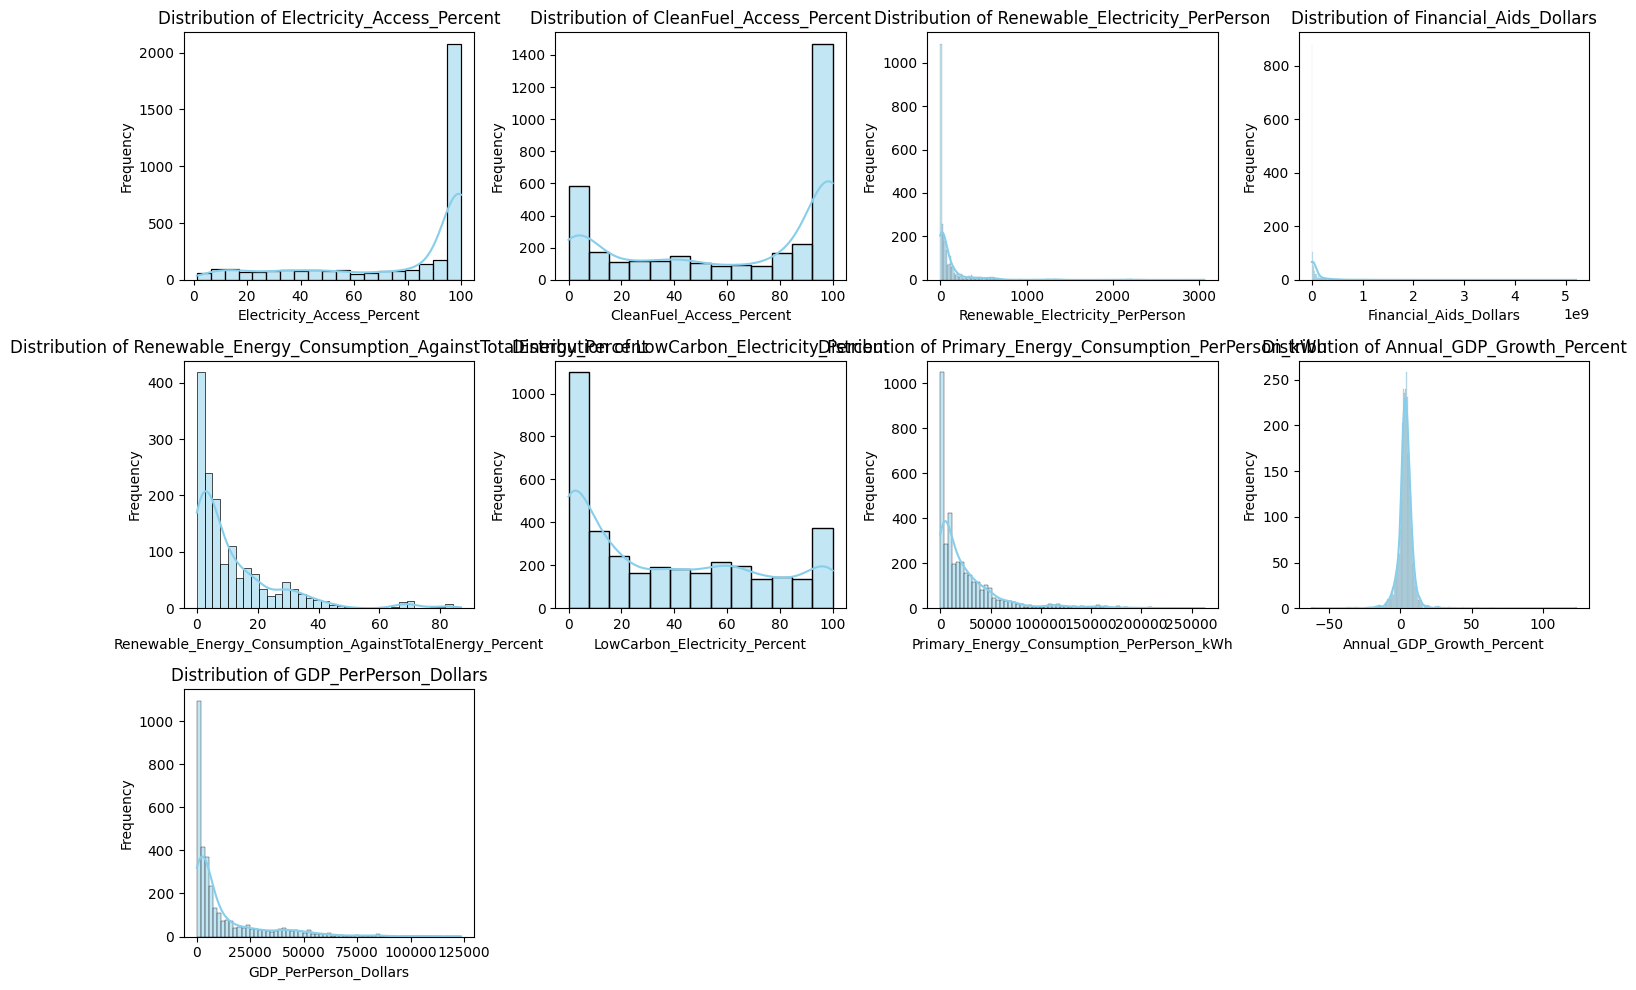

In [395]:
# Set up the plot
plt.figure(figsize=(15, 10))

# Loop over each feature to plot its distribution
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_key_features[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('images/co2_regression_data_dist.jpg')
plt.show()

### Step 2: Train-Test Split
Split the data into training and testing sets.

In [401]:
#By scaling the data and rerunning the regression models (Linear Regression, Ridge, and Lasso), 
#we ensure that the features are comparable in magnitude, which improves the model's performance. 

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_scaled = scaler.fit_transform(df_filtered[features])


In [402]:
from sklearn.model_selection import train_test_split

# Define the target (CO2 emissions) and the features
X = df_filtered[features]
y = df_filtered[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



### Step 3: Build Models: Linear Regression, Ridge, and Lasso

In [404]:
# Perfrom GridSearch on Ridge and Lasso to find the best hyperparameters.

# Define the parameter grid for Ridge and Lasso
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Apply GridSearchCV with Cross Validation = 5, to find the best Ridge parameters
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Apply GridSearchCV to find the best Lasso parameters
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Get the best parameters for both Ridge and Lasso
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Lasso alpha:", lasso_grid.best_params_)

Best Ridge alpha: {'alpha': 100}
Best Lasso alpha: {'alpha': 100}


In [411]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Initialize the models and use parameter base on GridSearch from above
lr = LinearRegression()
ridge = Ridge(alpha=100)
lasso = Lasso(alpha=100)

# Fit the models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate the mean squared error for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f'Linear Regression - MSE: {mse_lr}')
print(f'Ridge Regression - MSE: {mse_ridge}')
print(f'Lasso Regression - MSE: {mse_lasso}')




Linear Regression - MSE: 284146054678.51086
Ridge Regression - MSE: 282701282002.0081
Lasso Regression - MSE: 284081928229.51855


### Step 4: Model Evaluation

Compare the performance of the three models (Linear Regression, Ridge, and Lasso) based on the Mean Squared Error (MSE). The model with the lowest MSE is considered the best-performing model.

In [412]:
# Create a dictionary to store the results
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [mse_lr, mse_ridge, mse_lasso]
}

# Convert to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


               Model           MSE
0  Linear Regression  2.841461e+11
1   Ridge Regression  2.827013e+11
2   Lasso Regression  2.840819e+11


### Step 5: Predict CO2 Emissions Using the Best-Performing Model

Select the best-performing model based on the evaluation metrics (MSE) and use it to predict CO2 emissions.

In [407]:
# Use the Ridge regression model to predict CO2 emissions
predicted_co2 = ridge.predict(df_filtered[features])

# Create a DataFrame with country, year, and predicted CO2 emissions
df_predictions = pd.DataFrame({
    'Country': df_filtered['Country'],
    'Year': df_filtered['Year'],
    'Predicted_CO2_Emissions': predicted_co2
})

# Display the first few rows of the predictions
df_predictions.head(100)


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


,Country,Year,Predicted_CO2_Emissions
0,Afghanistan,2000,1.449686e+09
1,Afghanistan,2001,9.236069e+09
2,Afghanistan,2002,2.800249e+11
3,Afghanistan,2003,1.840989e+12
4,Afghanistan,2004,7.032318e+11
...,...,...,...
95,Antigua and Barbuda,2011,6.754647e+12
96,Antigua and Barbuda,2012,7.031019e+12
97,Antigua and Barbuda,2013,1.847331e+11
98,Antigua and Barbuda,2014,1.883835e+12


### Step 6: Visualize the Results
We will plot the predicted CO2 emissions for each country using a bar plot.

/tmp/ipykernel_6883/2092307749.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_predictions, x='Country', y='Predicted_CO2_Emissions', ci=None)


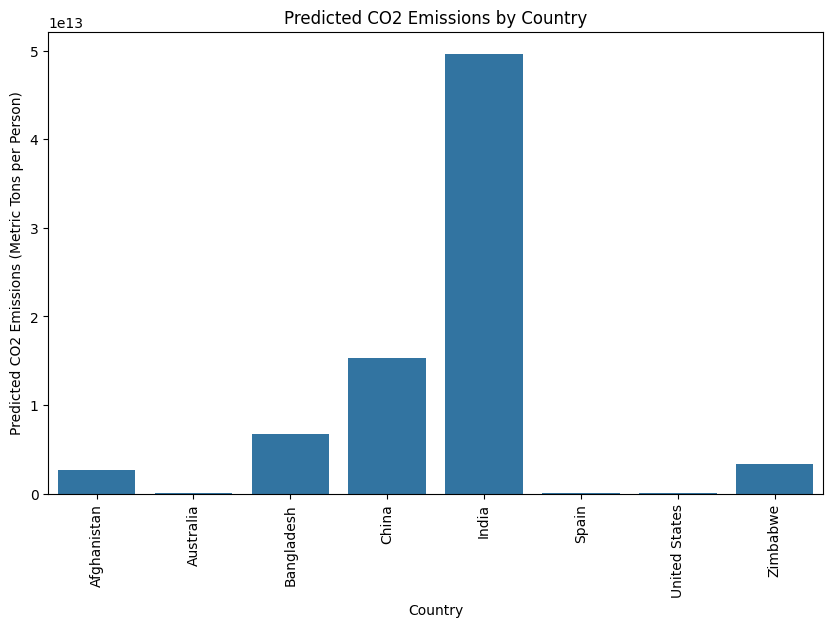

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for 10 selected countries to minimize higher computational requirement
selected_countries = ['United States', 'China', 'India', 'Afghanistan', 'Australia', 'Bangladesh', 'Saudi Arabia'
                     'Mozambique', 'Spain', 'Zimbabwe']
df_predictions = df_predictions[df_predictions['Country'].isin(selected_countries)]


# Plot the predicted CO2 emissions
plt.figure(figsize=(10, 6))
sns.barplot(data=df_predictions, x='Country', y='Predicted_CO2_Emissions', ci=None)
plt.xticks(rotation=90)
plt.title('Predicted CO2 Emissions by Country')
plt.ylabel('Predicted CO2 Emissions (Metric Tons per Person)')
plt.xlabel('Country')
plt.savefig('images/Predicted_CO2_Emissions_by_Country.jpg')
plt.show()
